## 한글 워드 클라우드 - 여친선물

#### KoNLPy 설치
- 'Konlpy 오류시 참고'로 검색
- jpype download(https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype)
- 본인의 파이썬 버전에 맞게 설치(예: Python 3.8)
- version: JPype1-1.1.2-cp38-cp38-win_amd64.whl
- download 프로그램이 있는 디렉토리로 이동
- pip install JPype1-1.1.2-cp38-cp38-win_amd64.whl
- conda activate base
- pip install konlpy
- 관리자 권한으로 cmd 실행
- pip install tweepy==3.10.0
- vscode 재실행

In [1]:
import konlpy
konlpy.__version__

'0.5.2'

In [2]:
# Open Korean Text
from konlpy.tag import Okt
okt = Okt()
okt.nouns('해당 에러가 발생하는 것을 알 수 있다.')

['해당', '에러', '발생', '것', '알', '수']

만약 위의 코드에서 에러가 날 경우
- 시스템속성 -> 환경변수 -> 시스템 변수 -> 새로 만들기 (변수이름: JAVA_HOME 변수값: Program Files -> Java -> jdk-17.0.1 -> Lincese 우클릭 -> 파일 위치 복붙)

#### 여친 선물 - 워드 클라우드 만들기

In [3]:
with open('data/gift.txt', encoding='utf8') as file:
    gift_text = file.read()

In [4]:
tokens = okt.nouns(gift_text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [5]:
# 한글 이외의 글자는 제거
import re
new_tokens =[]
for token in tokens:
    new_token = re.sub('[^가-힣 ]', '', token)
    if new_token:       # ''는 포함시키지 말 것
        new_tokens.append(new_token)

In [6]:
#if '':
    #print('a')
#else:
    #True

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

- 엉터리 단어 제거 - 수동으로 반복 처리

In [8]:
import nltk

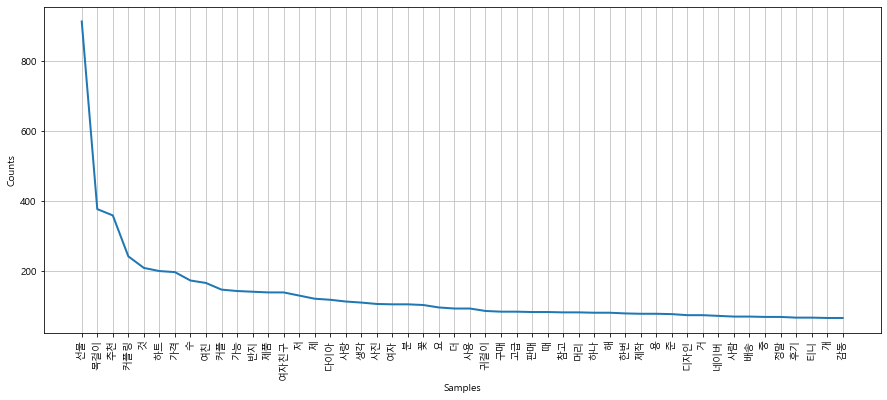

In [9]:
gf_gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [10]:
# stop_list = ['선물','추천']
stop_words = '선물 추천 것 가격 수 여친 커플 가능 제품 여자친구 체 제 사랑 생각 여자 분 저 요 더 사용 구매 고급 판매 때 참고 머리 하나 해 한번 제작 용 준 디자인 거 네이버 사람 배송 중 정말 후기 티니 개 감동 세대 인기 상품 직접 브랜드 선택 곳 끈 모양 마감 네임카드 등 큐빅'
stop_list = stop_words.split()

'''new_token_list = []
for token in new_tokens: 
    if token not in stop_list:
        new_token_list.append(token)
new_tokens = new_token_list'''

new_tokens = [token for token in new_tokens if token not in stop_list]

-  워드 클라우드 그리기

In [11]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [12]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('선물', 914),
 ('목걸이', 378),
 ('추천', 360),
 ('커플링', 243),
 ('것', 210),
 ('하트', 201),
 ('가격', 198),
 ('수', 174),
 ('여친', 167),
 ('커플', 148)]

In [13]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf', 
    relative_scaling=0.2, 
    background_color='white'
).generate_from_frequencies(dict(data))

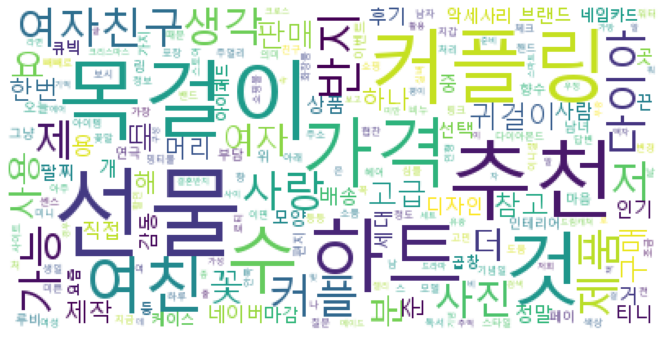

In [14]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

In [16]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf', 
    relative_scaling=0.2, mask=mask,  
    background_color='white', 
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

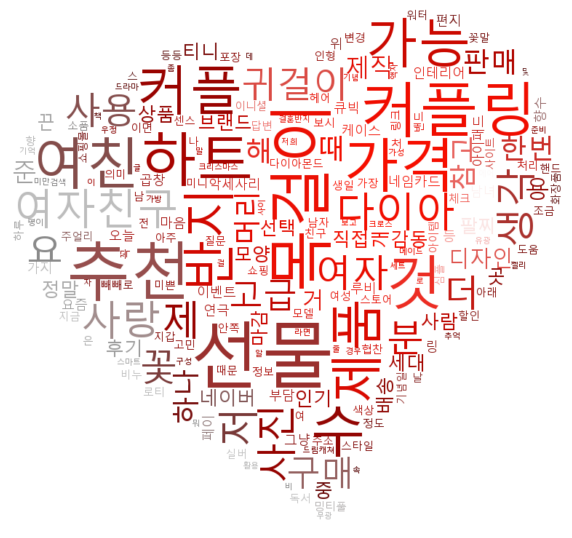

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()